In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
# from sklearn.datasets import load_boston
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [11]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data,target,test_size=0.3, random_state=42)

In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree

In [13]:
dt = DecisionTreeRegressor(max_depth=2).fit(x_train,y_train)

In [14]:
y_pred = dt.predict(x_test)

In [15]:
from sklearn.metrics import r2_score

In [16]:
r2_score(y_test,y_pred)

0.6758436094969433

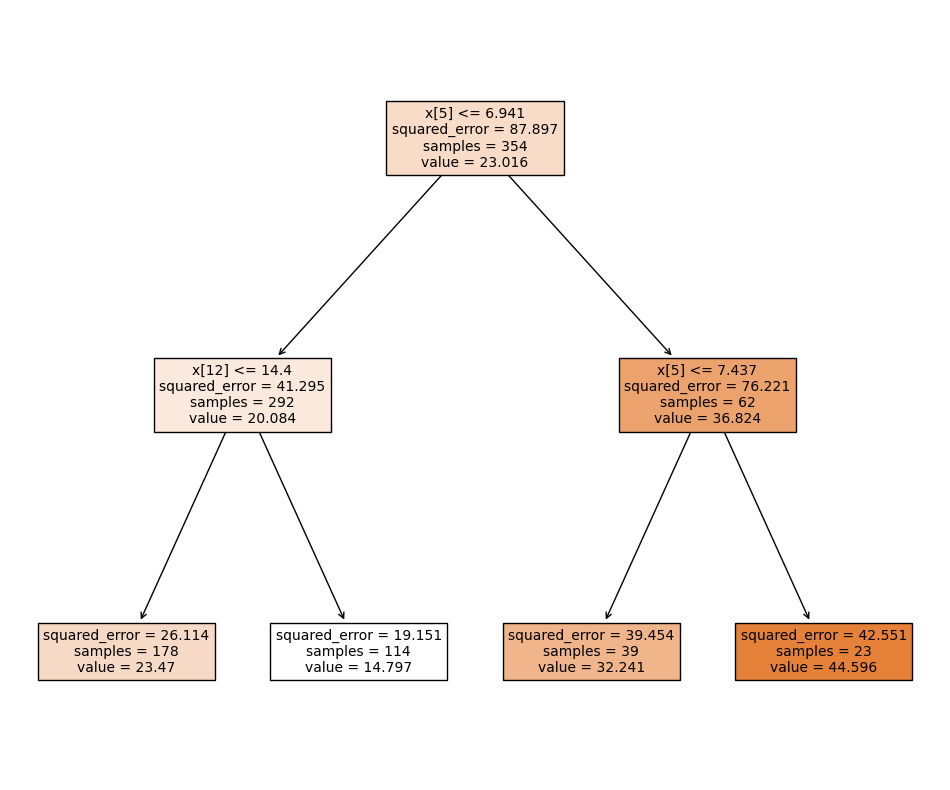

In [17]:
plt.figure(figsize=(12, 10))
tree.plot_tree(dt, fontsize=10, filled=True)
plt.show()

# Hyperparameter Tuning using GridSearchCV

In [35]:
from sklearn.model_selection import GridSearchCV

In [37]:
param_grid = {
    'criterion' : ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'splitter' : ['best', 'random'],
    'max_depth' : [2, 3, 4, 6, 7, 8],
    'min_samples_split' : [60, 70, 80, 100],
     'min_samples_leaf' : [4, 5, 7, 8, 10, 15]
}

In [39]:
gs = GridSearchCV(DecisionTreeRegressor(), param_grid=param_grid).fit(x_train,y_train)

In [40]:
gs.best_params_

{'criterion': 'poisson',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 60,
 'splitter': 'random'}

In [41]:
gs.best_score_

0.7214499058691594

In [47]:
y_pred = gs.predict(x_test)

In [48]:
r2_score(y_test,y_pred)

0.6075234235495657